<table width=100%>
<tr>
    <td><h1 style="text-align: left; font-size:300%;">
       Protein Expression in Mice with Down Syndrome
    </h1></td>
    <td width="20%">
    <div style="text-align: right">
    <b> Homework Machine Learning 2020</b> 
    <br> Emanuel Michele Soda <br>
    <a href="emanuelmichele.soda@mail.polimi.it">emanuelmichele.soda@mail.polimi.it</a><br>
    </div>
    </td>
    <td width="111px"> 
        <a href="https://www.polimi.it">
        <img align="right", width="95px" src='https://labolfattometrico.chem.polimi.it/wp-content/uploads/2019/12/POLIMI-corretto-3-1024x1024.jpg' alt=''>
        </a>
    </td>
</tr>
</table>

# Importing Packages 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import sklearn as sk
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from sklearn.feature_selection import SelectKBest   #ricordali di toglierli nel caso non servono 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import NearestNeighbors
np.random.seed(0)
sns.set(style = "white")
#import warnings
#warnings.filterwarnings('ignore')


# Loding data and Data Preparation

In [2]:
train = pd.read_csv("Data/train.csv")
train.head()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.650511  1.158653  0.580172  2.230388  3.179675  0.533686  0.440101   
1  0.365907  0.651296  0.810468  2.597217  4.131603  0.537554  0.249235   
2  0.260145  0.397996  0.229522  2.643311  4.303648  0.268394  0.050916   
3  0.239489  0.271240  0.766816  1.872419  2.424971  0.322269  0.386791   
4  0.617112  0.751737  0.050685  2.356175  3.494138  0.506875  0.310644   

   pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N     pS6_N   pCFOS_N  \
0   5.033898  0.200985  1.589221  ...  0.047287  0.337121  0.203356  0.191360   
1   6.099538  0.226362  1.700578  ...  0.521112  0.419544  0.231619  0.393897   
2   3.130455  0.273792  2.534531  ...  0.047407  0.053130  0.096325  0.257402   
3   2.351832  0.034265  0.472725  ...  0.273651  0.162382  0.234056  0.180657   
4   3.855825  0.309879  1.033428  ...  0.172488  0.014086  0.191145  0.149622   

      SYP_N  H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N   class  
0  0.590874   0.112145  0.110109  0.160637  1.329248  t-CS-m  
1  0.252572   0.352687  0.085545  0.328537  1.008023  t-SC-s  
2  0.246015   0.203979  0.039188  0.008315  1.193634  c-SC-s  
3  0.351388   0.103896  0.302341  0.166020  0.689970  c-CS-m  
4  0.310434   0.151685  0.180055  0.383039  1.737274  t-CS-s  

[5 rows x 77 columns]

## Get Class Labels

In [3]:
labelClass = train['class'] # the class column
le = preprocessing.LabelEncoder()
codedLabel = le.fit_transform(labelClass)  # fitta il trasformatore e mi ritorna le label 
#codedLabel = le.transform(labelClass)

## Preliminary Analysis 
### Data visualizzation 
In order to have an idea of our data, we can plot them to see if they are correleted. We can think of using the pairplot to show how each feature is correlated to the other but this is impossible due to the high number of features. We can instead, to begin with, plotting the correlation matrix. And then tray to reduce the number of features.

As we can see using the correlation matrix the features are moderately correlated.

In [4]:
#plotting the number of mouse divided in 'control' and 'trisomy'

trysomi = train['class'].str.contains("t-")
control = train['class'].str.contains("c-")

trysomi_vs_control = pd.DataFrame({'Trysomi':[sum(trysomi)], 'Control':[sum(control)]}, index = ['total']).T
sns.barplot(x = ['Trysomi', 'Control'], y = "total", data = trysomi_vs_control)


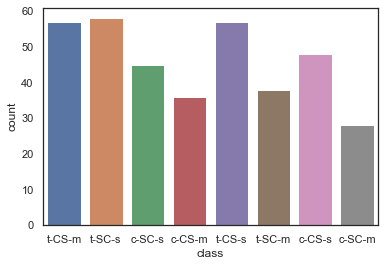

In [5]:
#numero di sample nelle diverse classi 

sns.countplot(train['class'])

In [6]:
# we drop the target class
train = train.drop(columns = 'class', axis = 1)

In [7]:
def visualizeCorrMat(data): # Create correlation matrixc
    f, ax = plt.subplots(figsize = (11, 9))
    mask = np.triu(np.ones_like(data, dtype = np.bool))
    cmap = sns.diverging_palette(220, 10, as_cmap = True)
    sns.heatmap(data, mask = mask, cmap = cmap, vmax = 1, center = 0,
            square = True, linewidths = .9, cbar_kws = {"shrink": .5})
    
    
    
# def visualizeCorrMat(data): # Create correlation matrixc
#     plt.figure() #figsize = (12,10)
#     sns.heatmap(data, center = 0)

# corrMat = train.corr()
# visualizeCorrMat(corrMat)

In [8]:
corrMat = train.corr()
visualizeCorrMat(corrMat)

## Variance visualizzation
In ordert to understand our daset we show the variance among the features, it is always a good practice to analyze the variance to understand if our data need normalization. In our particolar in our dataset presentslots of features with low variance e some features with high variance.

Max Variance value :	 1.926769317467468
Min Variance value :	 0.00040275706051909544
Mean Variance value:	 0.09739601260421206


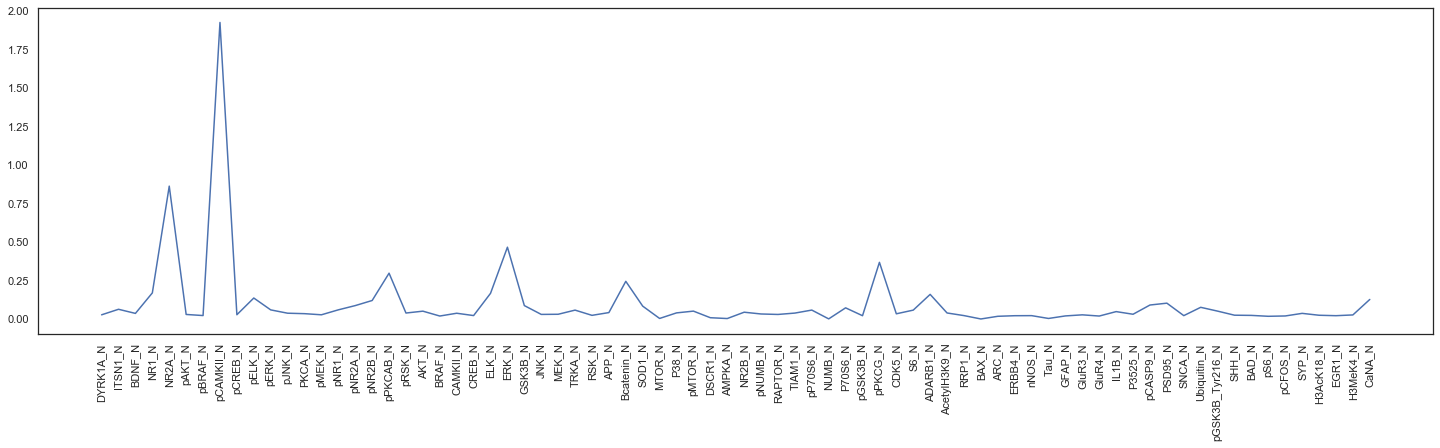

In [9]:
def varianceVisualization(data):
    print("Max Variance value :\t", data.var().max())
    print("Min Variance value :\t", data.var().min())
    print("Mean Variance value:\t", data.var().mean())
    plt.figure(figsize = (25, 6))
    plt.xticks(rotation = 90)
    plt.plot(data.var())
    
varianceVisualization(train)


## Data normalization 
In order to deal with this problem we perform a data normalizaion, using the min_max_scaler

Max Variance value :	 1.0027322404371597
Min Variance value :	 1.0027322404371575
Mean Variance value:	 1.0027322404371584


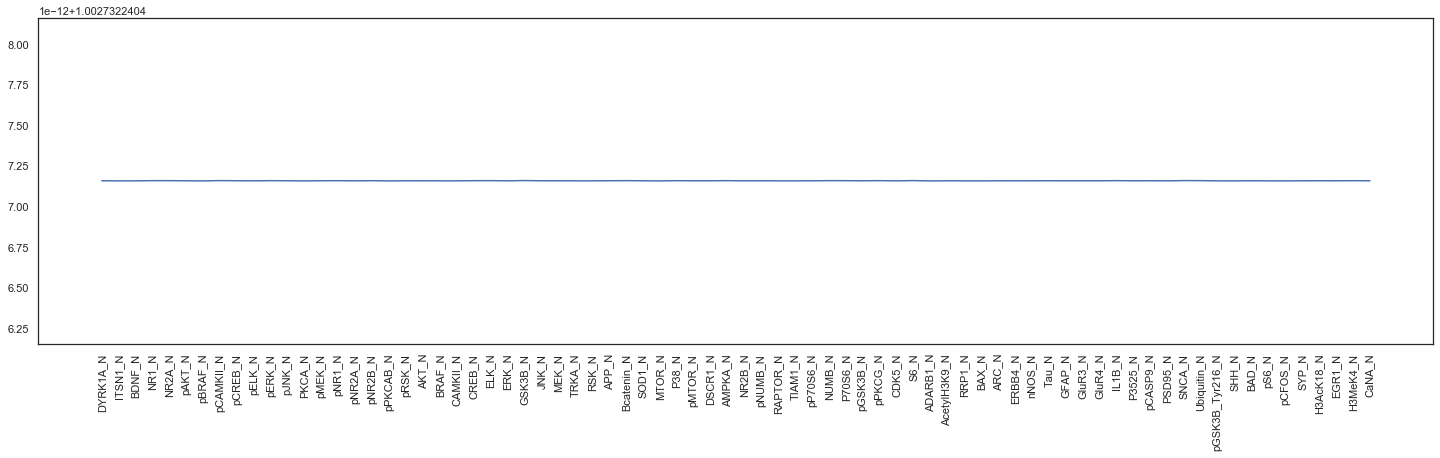

In [10]:
standard_scaler = preprocessing.StandardScaler().fit(train)
#min_max_scaler = preprocessing.MinMaxScaler().fit(train)
#train = pd.DataFrame(min_max_scaler.transform(train), columns = train.columns)
train = pd.DataFrame(standard_scaler.transform(train), columns = train.columns)
varianceVisualization(train)


### Data visualization
Let's have a look at the data, in order to do this we select the first 3 principal component 

In [11]:
def principalComponent(data, n_comp): # compute PC and % variation expressed by the PCs
    #scaled_Train = scale(train.drop(['class'], axis = 1))
    pca = PCA(n_comp) 
    return pca.fit_transform(data), np.round(100 * pca.explained_variance_ratio_, decimals = 2), pca.singular_values_

principalComp, per_var, singular_values = principalComponent(train, min(train.shape))

In [12]:
def visualizePrincipalComponentVar(per_var):
    plot_labels = ['PC' + str(s) for s in range(1, len(per_var) + 1)]
    plt.figure(figsize = (45, 15))
    colormat = np.where(per_var < 1, '#ff7f0e','#1f77b4')
    plt.bar(x = range(1, len(per_var) + 1), height = per_var, tick_label = plot_labels, color = colormat)
    plt.xticks(rotation = 45, size = 25)
    plt.yticks(size = 25)
    plt.ylabel('Percentage of Explained Variance', size = 30)
    plt.xlabel('Principal Component', size = 30)
    plt.title('Principal Component Variance explained', size = 40)
    plt.show()
    return plot_labels

plot_labels = visualizePrincipalComponentVar(per_var)

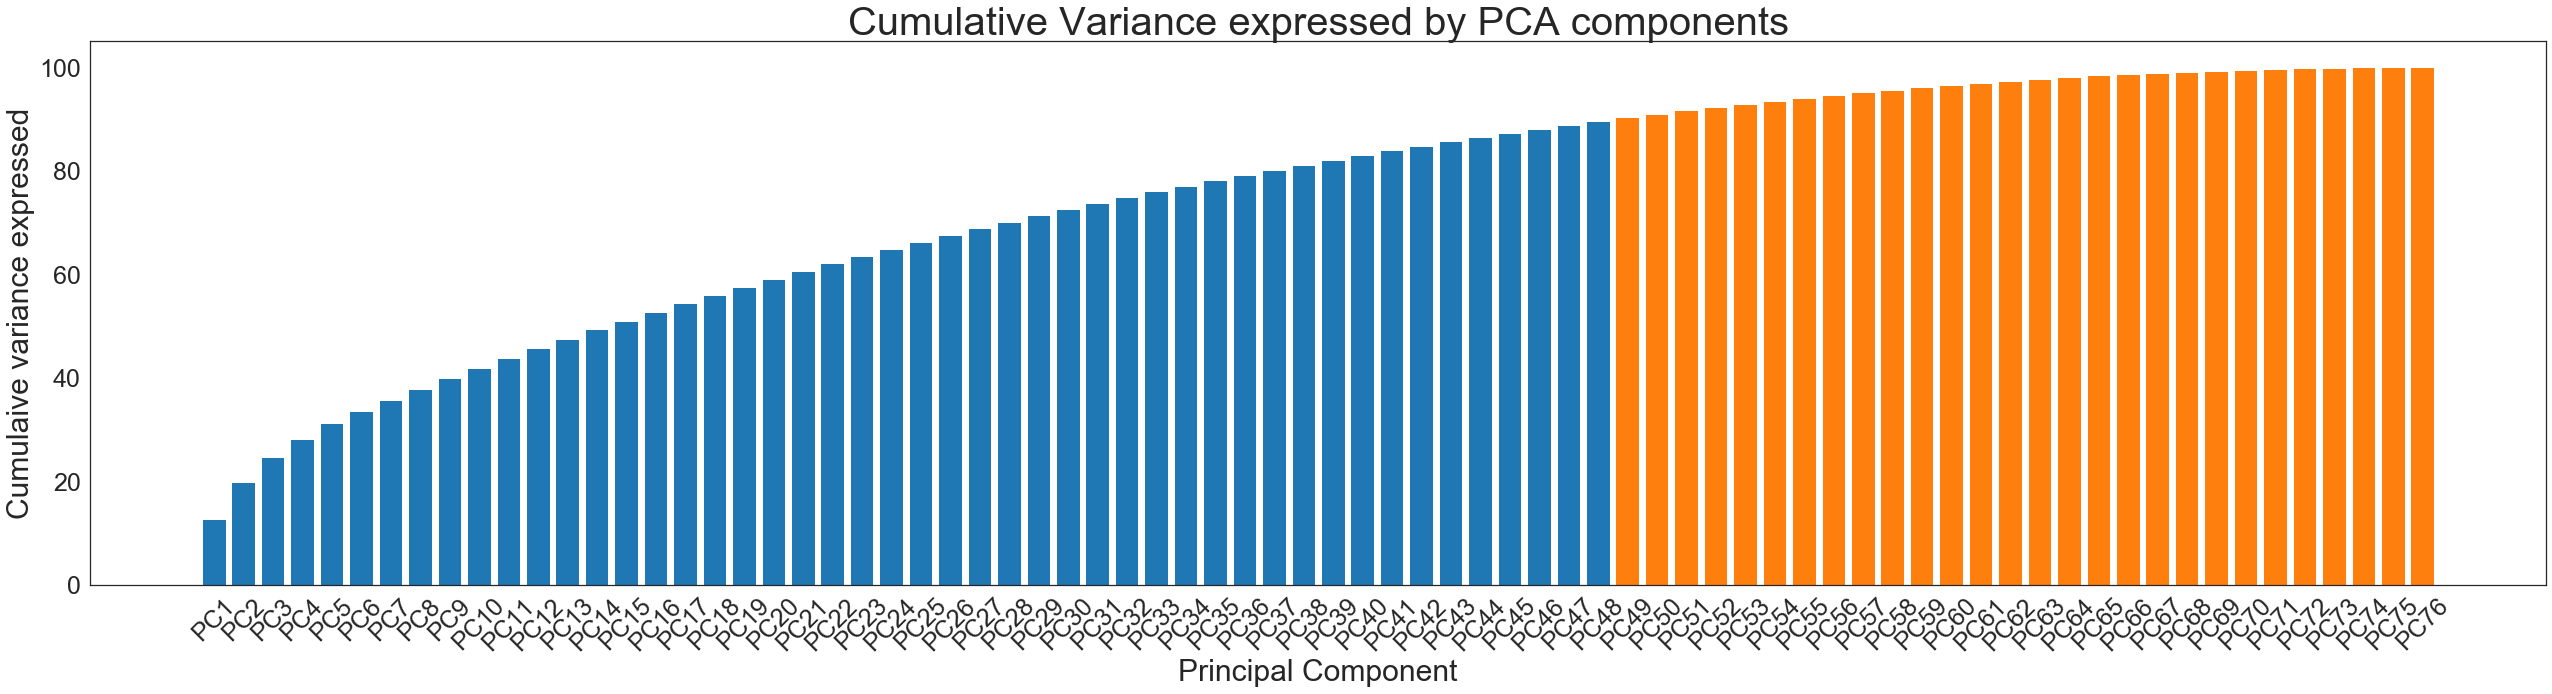

In [13]:
def visualizeCumulativePCAvar(cum_var):
    plot_labels = ['PC' + str(s) for s in range(1, len(cum_var) + 1)]
    plt.figure(figsize = (44, 10))
    colormat = np.where(cum_var > 90, '#ff7f0e','#1f77b4')
    plt.bar(x = range(1, len(cum_var) + 1), height = cum_var, tick_label = plot_labels, color = colormat)
    #plt.hlines(y = 90, xmin = 1, xmax = len(cum_var) + 1)
    plt.ylabel('Cumulaive variance expressed', size = 30)
    plt.xlabel('Principal Component', size = 30)
    plt.xticks(rotation = 45, size = 25)
    plt.yticks(size = 25)
    plt.title('Cumulative Variance expressed by PCA components', size = 40)
    plt.show()
    
    
cum_var = per_var.cumsum()
visualizeCumulativePCAvar(cum_var)

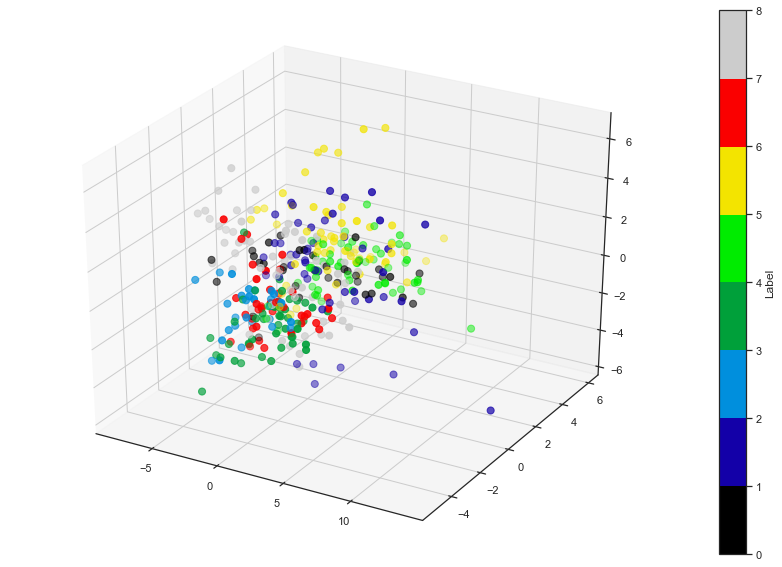

In [14]:
def plotPCA(Label, pc, **label_):
    unique_labelClass = np.unique(Label) 
    nlabels = len(unique_labelClass) 
    fig = plt.figure(figsize = (15, 10))
    ax = fig.add_subplot(111, projection = '3d')
    col = ('tab10' if nlabels <= 10 else  ('tab20' if nlabels <= 20 else 'hsv'))
    cmap = plt.cm.get_cmap('nipy_spectral', nlabels)
    smap = cm.ScalarMappable(norm = mcolors.Normalize(unique_labelClass.min(), 
                                                      unique_labelClass.max() + 1),   cmap = cmap)
    ax.scatter(xs = pc.PC1, ys = pc.PC2, zs = pc.PC3, marker = '.', s = 200, 
               c = Label, cmap = cmap)
    plt.colorbar(mappable = smap, label = 'Label')

#per ora ho ignorato " _ " la percentuale di varianza espressa e i singular values
pc_plot, _, _ = principalComponent(train, 3)
pc_plot = pd.DataFrame(pc_plot, columns = plot_labels[0 : 3])

plotPCA(codedLabel, pc_plot)

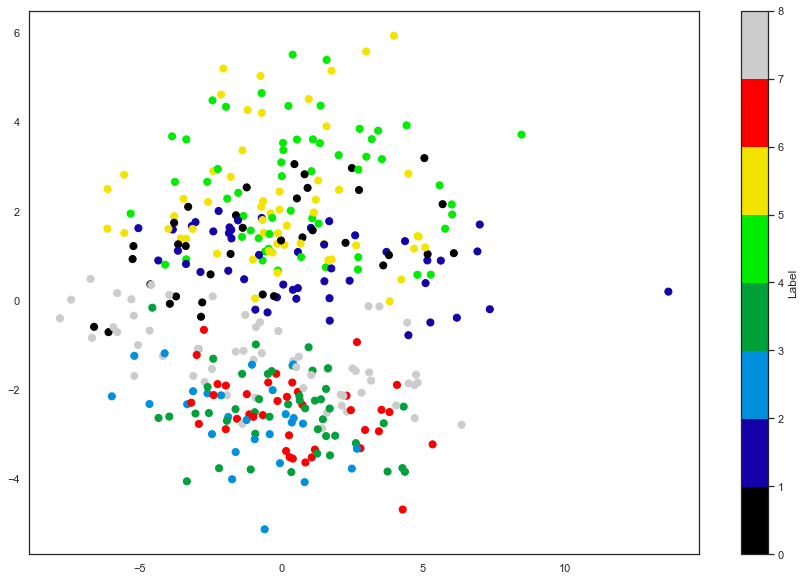

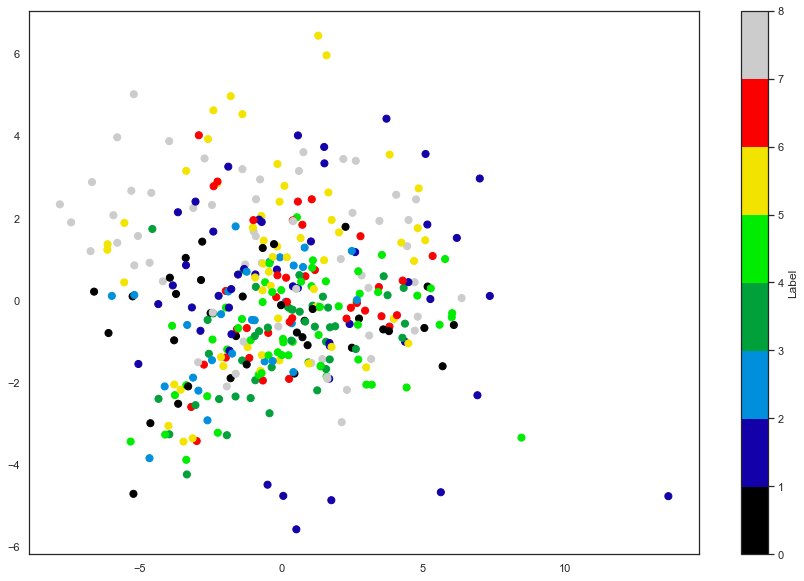

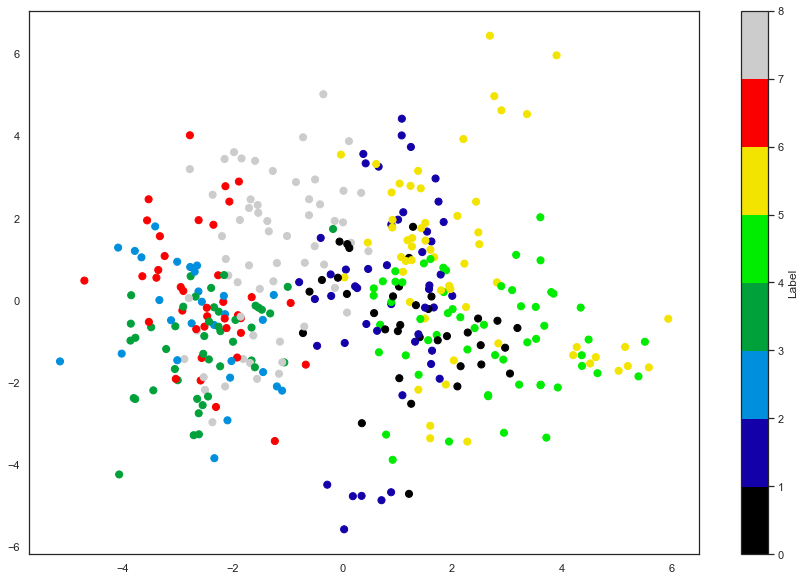

In [15]:
def plot2dPCA(Label, pc1, pc2):
    unique_labelClass = np.unique(Label) 
    nlabels = len(unique_labelClass) 
    fig = plt.figure(figsize = (15, 10))
    col = ('tab10' if nlabels <= 10 else  ('tab20' if nlabels <= 20 else 'hsv'))
    cmap = plt.cm.get_cmap('nipy_spectral', 8)
    smap = cm.ScalarMappable(norm = mcolors.Normalize(unique_labelClass.min(), 
                                                      unique_labelClass.max() + 1),cmap = cmap)
    plt.scatter(x = pc1, y = pc2, marker = '.', s = 200, c = Label, cmap = cmap)
    plt.colorbar(mappable = smap, label = 'Label')
      
plot2dPCA(codedLabel, pc_plot.PC1, pc_plot.PC2)
plot2dPCA(codedLabel, pc_plot.PC1, pc_plot.PC3)
plot2dPCA(codedLabel, pc_plot.PC2, pc_plot.PC3)

## Clustering

We can use some unsupervised learning tecnique to see if there are some structure in the data.

In [16]:
# metrics
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
def sorted_sim(sim, y_pred):
    idx_sorted = np.argsort(y_pred)
    # Sort the rows
    sim = sim[idx_sorted]
    # Sort the columns
    sim = sim[:, idx_sorted]
    
    return sim

def wss(X, y_pred, metric):
    ncluster = np.unique(y_pred).shape[0]
    err = 0
    for k in range(ncluster):
        # All the points of this cluster
        X_k = X[y_pred == k]
        # Distances of all points within the cluster
        dist_mat = pairwise_distances(X_k, metric=metric)
        # Select the lower triangular part of the matrix
        triu_idx = np.tril_indices(dist_mat.shape[0], k=1)
        err += (dist_mat[triu_idx] ** 2).sum()
    
    return err

def bss(X, y_pred, metric):
    ncluster = np.unique(y_pred).shape[0]
    # Sort the distance matrix (as we did for the simiarity)
    dist_mat = pairwise_distances(X, metric=metric) ** 2
    dist_mat = sorted_sim(dist_mat, y_pred)
    y_sort = np.sort(y_pred)
    
    err = 0
    for k in range(ncluster):
        kidx = np.where(y_sort == k)[0]
        start, end = kidx[0], kidx[-1]
        err += dist_mat[start:end, end+1:].sum()
    
    return err



def incidence_mat(y_pred):
    npoints = y_pred.shape[0]
    mat = np.zeros([npoints, npoints])
    # Retrieve how many different cluster ids there are
    clusters = np.unique(y_pred)
    nclusters = clusters.shape[0]
    
    for i in range(nclusters):
        sample_idx = np.where(y_pred == i)
        # Compute combinations of these indices
        idx = np.meshgrid(sample_idx, sample_idx)
        mat[idx[0].reshape(-1), idx[1].reshape(-1)] = 1
        
    return mat

def similarity_mat(X, metric):
    dist_mat = pairwise_distances(X, metric=metric)
    min_dist, max_dist = dist_mat.min(), dist_mat.max()
    
    sim_mat = 1 - (dist_mat - min_dist) / (max_dist - min_dist)
    return sim_mat

def correlation(X, y_pred, metric):
    inc = incidence_mat(y_pred)
    sim = similarity_mat(X, metric)
    inc = normalize(inc.reshape(1, -1))
    sim = normalize(sim.reshape(1, -1))
    corr = (inc @ sim.T)
    return corr[0,0]   

def sorted_sim(sim, y_pred):
    idx_sorted = np.argsort(y_pred)
    # Sort the rows
    sim = sim[idx_sorted]
    # Sort the columns
    sim = sim[:, idx_sorted]
    
    return sim

def plot_sorted_sim(sim, y_pred):
    sim = sorted_sim(sim, y_pred)
    
    fig, ax = plt.subplots(figsize=(40,30))  
    ax = sns.heatmap(sim, ax=ax)
    # Remove ruler (ticks)
    ax.set_yticks([]) 
    ax.set_xticks([])


In [17]:
# to plot the Metrics 
from sklearn.metrics import silhouette_score
def plotMetrics(X, models):
    silhouette_list , wss_list, bss_list = [], [], []
    for model in models:
        wss_list.append(wss(X, model.fit_predict(train), 'euclidean'))
        bss_list.append(bss(X, model.fit_predict(train), 'euclidean'))
        if model.n_clusters > 1:
            silhouette_list.append(silhouette_score(X, model.fit_predict(train), metric = 'euclidean')) 
    
    plt.plot(list(range(1, len(models) + 1)), wss_list, label = 'WSS')
    plt.plot(list(range(1, len(models) + 1)), bss_list, label = 'BSS')
    plt.legend()
    plt.show()
    plt.plot(list(range(2, len(models) + 1)), silhouette_list, label = 'Silhuette score')
    plt.legend()
    
    

In [18]:
# to plot the dendogram
from scipy.cluster.hierarchy import dendrogram, linkage
def plot_dendrogram(Z=None, model=None, X=None, **kwargs):
    annotate_above = kwargs.pop('annotate_above', 0)

    # Reconstruct the linakge matrix if the standard model API was used
    if Z is None:
        if hasattr(model, 'distances_') and model.distances_ is not None:
            # create the counts of samples under each node
            counts = np.zeros(model.children_.shape[0])
            n_samples = len(model.labels_)
            for i, merge in enumerate(model.children_):
                current_count = 0
                for child_idx in merge:
                    if child_idx < n_samples:
                        current_count += 1  # leaf node
                    else:
                        current_count += counts[child_idx - n_samples]
                counts[i] = current_count

            Z = np.column_stack([model.children_, model.distances_,
                                              counts]).astype(float)
        else:
            Z = linkage(X, method=model.linkage, metric=model.affinity)
    
    if 'n_clusters' in kwargs:
        n_clusters = kwargs.pop('n_clusters')
        # Set the cut point just above the last but 'n_clusters' merge
        kwargs['color_threshold'] = Z[-n_clusters, 2] + 1e-6
    
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    # Plot the corresponding dendrogram
    ddata = dendrogram(Z, ax=ax, **kwargs) 
    
    # Annotate nodes in the dendrogram
    for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
        x = 0.5 * sum(i[1:3])
        y = d[1]
        nid = np.where(Z[:,2] == y)[0][0]
        if y > annotate_above:
            plt.plot(x, y, 'o', c=c)
            plt.annotate(str(nid-Z.shape[0]), (x, y), xytext=(0, -5),
                         textcoords='offset points',
                         va='top', ha='center')
    if kwargs['color_threshold']:
        plt.axhline(y=kwargs['color_threshold'], c='k')
    
    return fig, ax

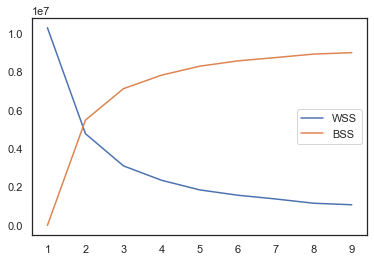

Silhouette_score:  0.07209181884210528


0.7315991795540772

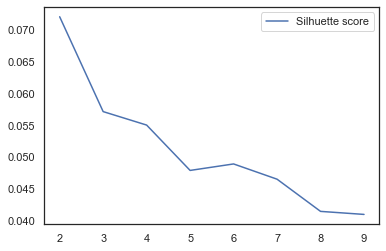

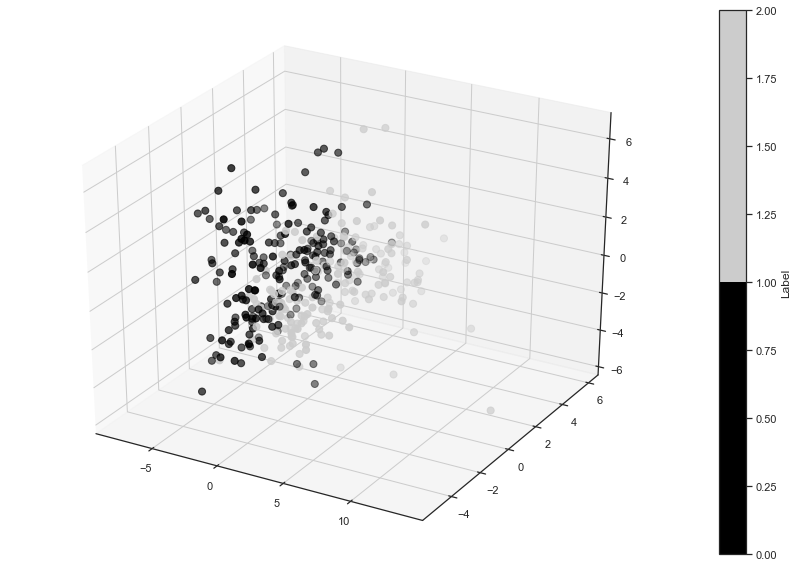

In [19]:
#KMEANS
from sklearn.cluster import KMeans

clus_list = list(range(1, 10))    
models_KM = []
for i in clus_list:
    models_KM.append(KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, random_state = 42))
 
plotMetrics(train, models_KM)

# according to the silhouette the best k = 2
k = 2
kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
#y_predict = kmeans.fit_predict(train)

print("Silhouette_score: ", silhouette_score(train, kmeans.fit_predict(train), metric = 'euclidean'))
plotPCA(kmeans.fit_predict(train), pc_plot)

correlation(train, kmeans.fit_predict(train), 'euclidean')


Text(0.5, 1.0, 'single')

Text(0.5, 1.0, 'average')

Text(0.5, 1.0, 'complete')

Text(0.5, 1.0, 'centroid')

Text(0.5, 1.0, 'ward')

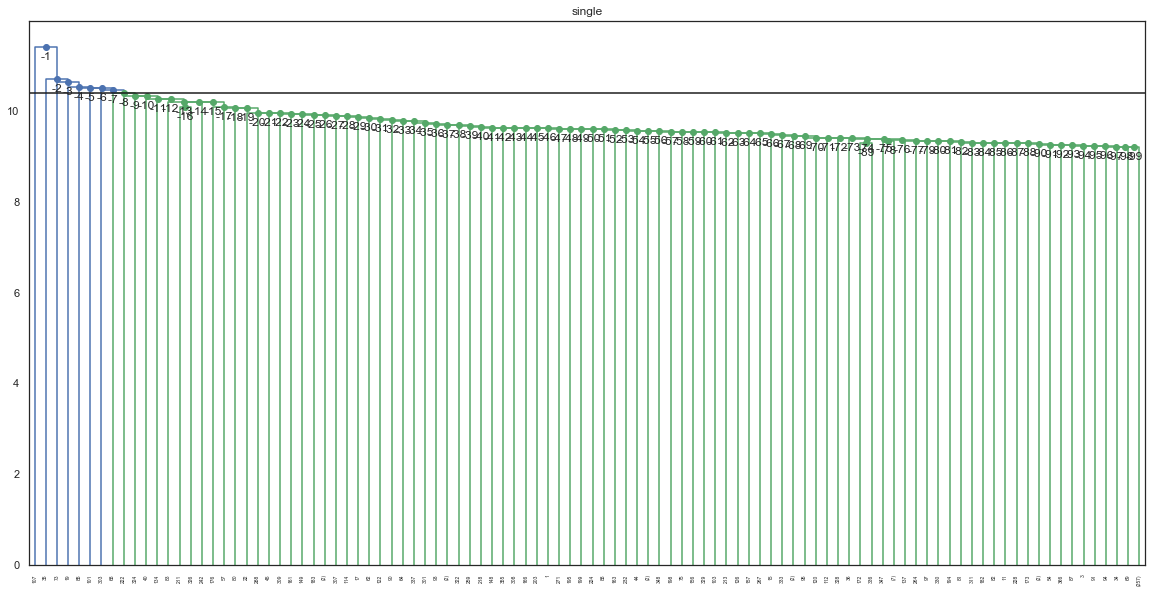

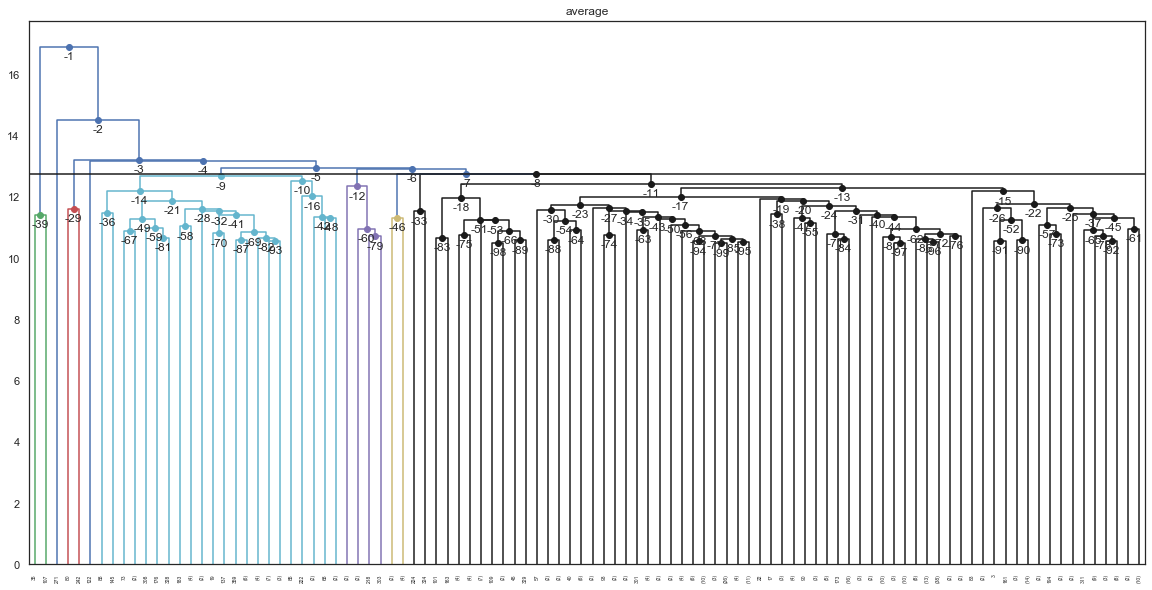

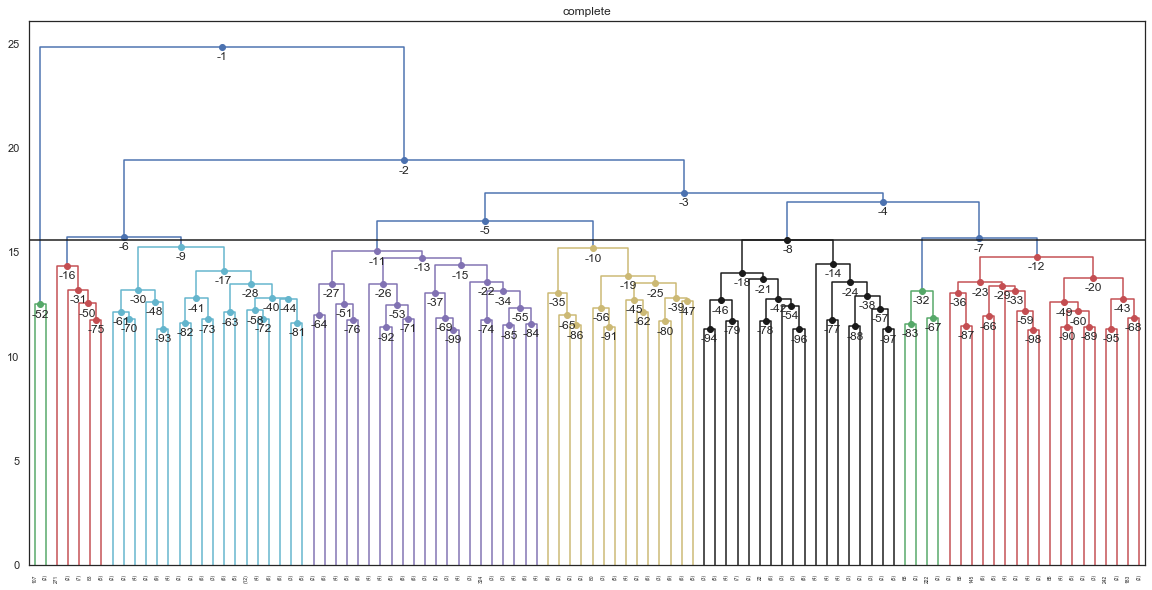

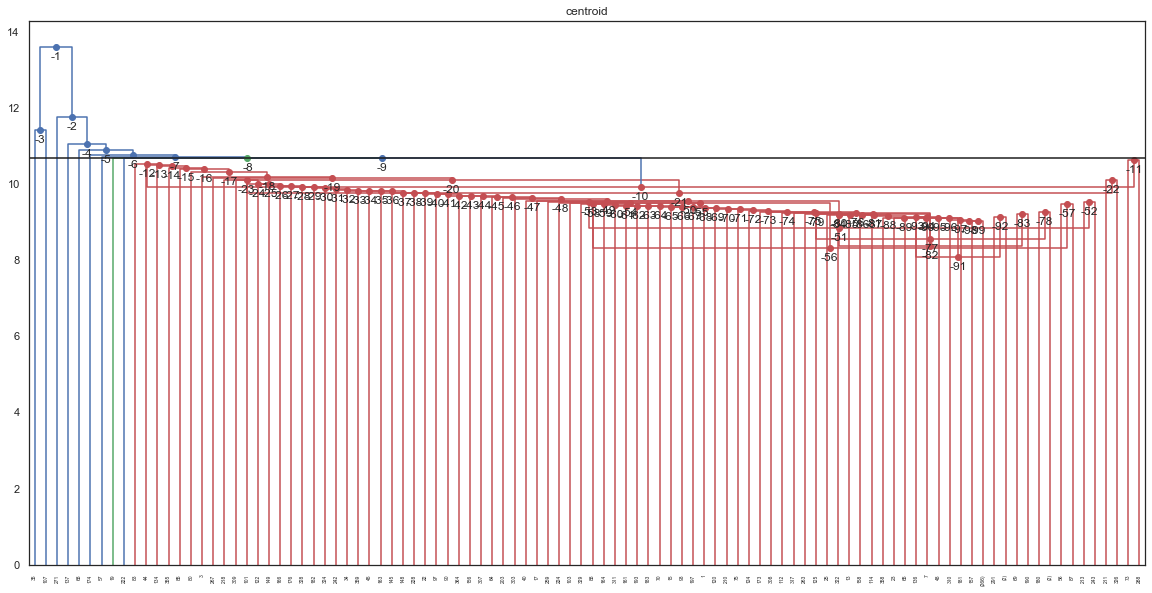

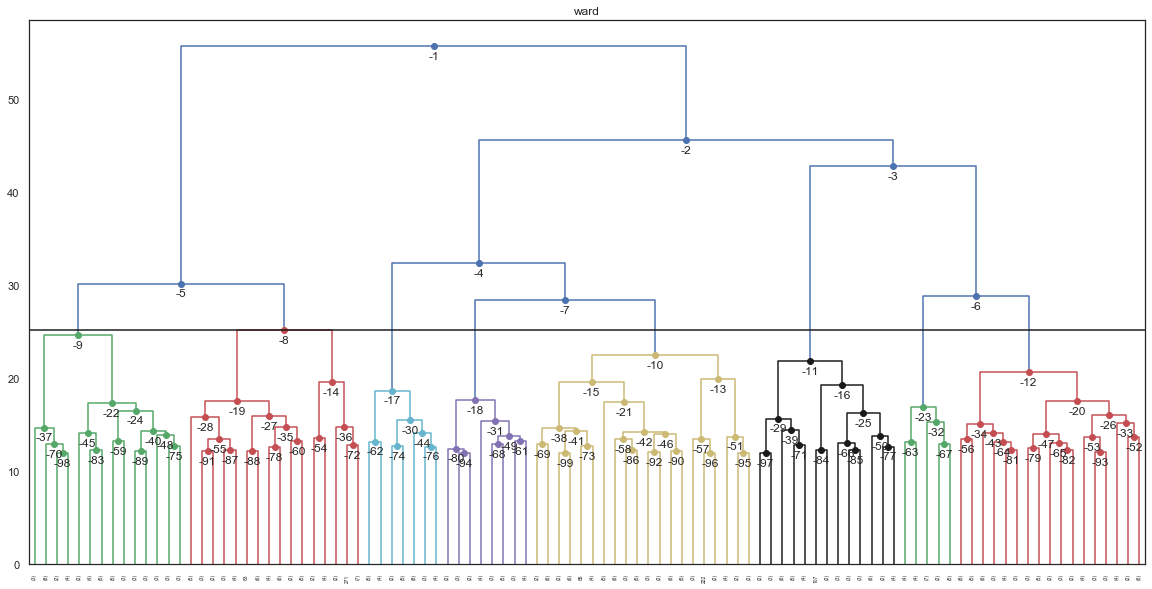

In [20]:
# lets try the  Hierarchical clustering
methods = ['single', 'average', 'complete', 'centroid', 'ward']

for method in methods:
    Z = linkage(train, metric = 'euclidean', method = method)
    fig, ax = plot_dendrogram(Z = Z, X = train, truncate_mode = 'lastp', 
                              p = 100, n_clusters = 8)
    ax.set_title(method)
    
        

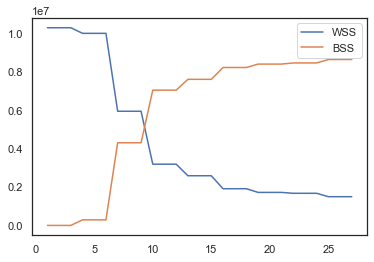

ValueError: x and y must have same first dimension, but have shapes (26,) and (24,)

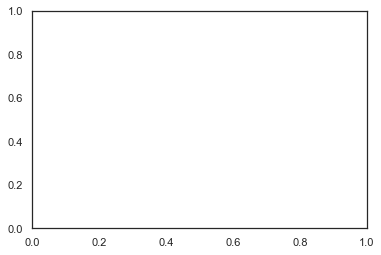

In [42]:
from sklearn.cluster import AgglomerativeClustering
distance_threshold= None 
models_AG = []
similarity = ["cosine", "euclidean", "cityblock"] # affinity = j, linkage = 'complete'
for i in clus_list:
    for j in similarity:
        models_AG.append(AgglomerativeClustering(n_clusters = i, 
                                                 distance_threshold = distance_threshold, 
                                                 affinity = 'euclidean', linkage = 'complete'))
    
plotMetrics(train, models_AG)


n_clusters = 2
agg = AgglomerativeClustering(n_clusters = 8, 
                                distance_threshold = distance_threshold, 
                                affinity = 'cosine', linkage = 'complete')

y_predict_agg = agg.fit_predict(train)
plotPCA(y_predict_agg, pc_plot)


print("Silhouette_score: ", silhouette_score(train, y_predict_agg, metric = 'euclidean'))
print("\nCorrelation: ")
correlation(train, y_predict_agg , 'euclidean')




In [20]:
#DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 4, min_samples = 1)
dbscan.fit(train)
#dbscan.labels_
y_predict_dbscan = dbscan.fit_predict(train)
plotPCA(y_predict_dbscan, pc_plot)




DBSCAN(algorithm='auto', eps=4, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=1, n_jobs=None, p=None)

In [2]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size = leaf_size, n_neighbors = n_neighbors, p = p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(estimator =  knn_2, param_grid = hyperparameters, cv = 10, n_jobs =-1)
#Fit the model
best_model = clf.fit(train,codedLabel)
print('Best leaf_size:', best_model.best_estimator_.get_params())



NameError: name 'KNeighborsClassifier' is not defined

In [4]:
neigh = NearestNeighbors(n_neighbors = 7, leaf_size = 1, p = 1)
nbrs = neigh.fit(train)


distances, indices = nbrs.kneighbors(train)
distances = np.sort(distances, axis = 0)
distances = distances[:,1]

#eps = 1.748428908
m = DBSCAN(eps = 10 , min_samples = 2).fit(train)
print("The labels are:\t", set(m.labels_))

plotPCA(m.labels_, pc_plot)

print("Silhouette_score: ", silhouette_score(train, m.labels_, metric = 'euclidean'))
print("\nCorrelation: ")
correlation(train, y_predict_agg , 'euclidean')



NameError: name 'train' is not defined

We can say that there are two main group as shown with the Kmeans clustering, this two cluster could be the two main group "control mouse" and "trisonomy mouse".

## Dataset Splitting and Removing SOD1_N  feature
Spleatting the training to obtain the validation set

In [329]:
features_SOD1_N = train['SOD1_N']
train = train.drop(columns = 'SOD1_N', axis = 1)
train_x, validation_x, train_y, validation_y = train_test_split(train, codedLabel, 
                                                                test_size = 0.20, random_state = 42)
# train_x.shape #(293, 75)
# train_y.shape #(293,)
# validation_x.shape #(74, 75)
# validation_y.shape #(74,)

## Feature Selection 

We have to performe the feature selection in orther to reduce the dimensionality of the features speace. This will lower the training time and also increasing the performance of the model that we will train. The first idea that we can think of is, remove the features that have low variance. Infact, our model will not learn very much from feature that aren't spread along the features space.

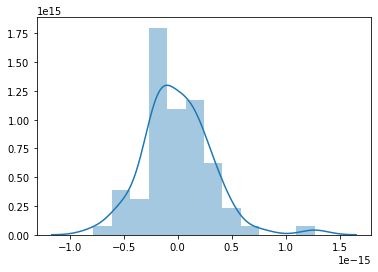

In [23]:
#histogramma media dell'espressione per gene 
# AL MASSIMO VA MESSO ALL'INZIO 
expr = train.iloc[:, 0 : len(train.columns)].mean().to_numpy()
#prova
#prova.shape
#sum(expr = 3)
sns.distplot(expr)

Another possible way is to use lasso iin orther to tray to solve the problem of features selection approximation the best subsect selection problem.

As we know the lasso has a penalization term that can be tuned by an hyperparameter. So in order to try to find the best hyper parameter we use performe a Grid search.

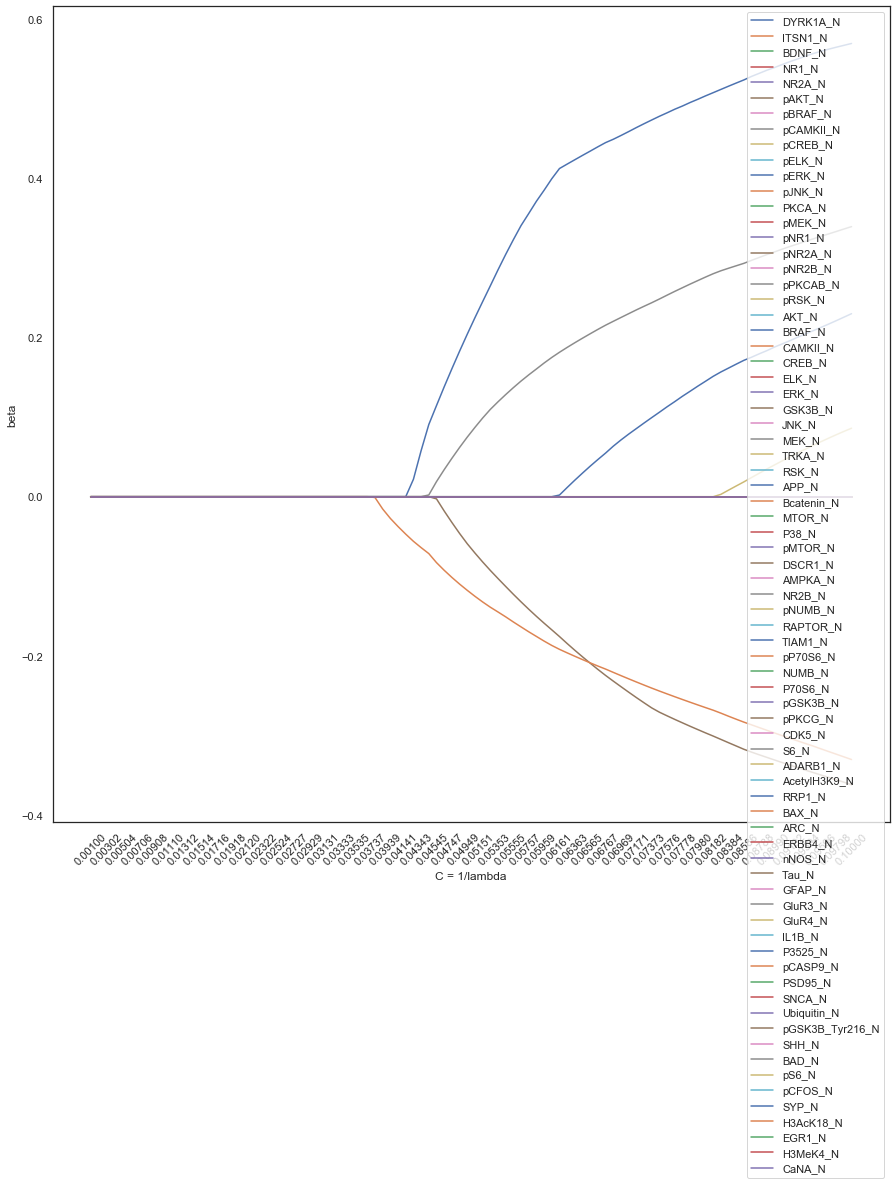

In [281]:
features = list(train.columns)

def solv(betas, C_vals, train, codedLabel,features ):
    C_vals = np.linspace(0.001, 0.1, 100)  #(0.001, 0.2, 100)
    betas = []
    for C in C_vals:
        model = LogisticRegression(solver = 'saga', penalty = 'l1', C = C, max_iter = 10000)
        model.fit(train, codedLabel)
        beta = model.coef_.reshape(-1)
        betas.append(beta)
    betas = np.stack(betas, axis = 1)
    plt.figure(figsize = (15, 15))   
    for beta, name in zip(betas, features):
        plt.plot(C_vals, beta, label = name)
    plt.legend()
    x_ticks = np.linspace(0.001, 0.1, 20)      #(0.001, 0.2, 20)
    plt.xticks(x_ticks, rotation = 45)
    #y_ticks = np.linspace(-0.5, 0.5, 20)
    #plt.yticks(y_ticks)
    plt.xlabel("C = 1/lambda")
    plt.ylabel("beta")
    
solv(betas, C_vals, train, codedLabel, features)

In [293]:
#sel = SelectFromModel(LogisticRegression(penalty = 'l1', solver = 'saga', C = 0.023636363636363636)).fit(train,  codedLabel) # più C è piccolo più riduce le features 
#features_lasso = train.columns[sel.get_support()]
#len(list(features_lasso))

#lasso_par = {'alpha': np.linspace(0.02, 2, 300)}
#estimator = GridSearchCV(linear_model.Lasso(), param_grid = lasso_par, #scoring = 'r2',
#                         return_train_score = True, cv = 10).fit(train_x, train_y)
# best_estimator = estimator.best_estimator_
# par = best_estimator.alpha
# par
# estimator.best_score_

In [333]:
C = {'C': np.linspace(0.001, 1, 300)}
provaEstimator = GridSearchCV(LogisticRegression(solver = 'saga', penalty = 'l1'), param_grid = C,
                              return_train_score = True, cv = 10).fit(train_x, train_y)


In [334]:
provaEstimator_best = provaEstimator.best_estimator_
provaEstimator.best_estimator_.C

0.7661204013377926

In [291]:
# Scelgo il modello per ridurre le features scelgo: Lasso <--- o almeno così dovrebbe essere con l1 penalty 
sel = SelectFromModel(LogisticRegression(penalty = 'l1', solver = 'saga', C = provaEstimator.best_estimator_.C)).fit(train_x,  train_y) # più C è piccolo più riduce le features 
features_lasso = train_x.columns[sel.get_support()]
len(list(features_lasso))
train_trasform_lasso = sel.transform(train_x)
#train[features_lasso]
reg = LinearRegression().fit(train_x[features_lasso], train_y)
reg.score(validation_x[features_lasso], validation_y)

#reg2 = LinearRegression().fit(train_x, train_y)
#reg2.score(validation_x, validation_y)

24

0.4472177919373118

In [292]:
sns.pairplot(train_x[features_lasso])

In [297]:
corrMat_selected = train_x[features_lasso].corr()
train_x  = train_x[features_lasso]
# QUI TOLGO SOLO QUELLE CON CORRELAZIONE ALTA.. MA ME NE TROVA SOLO 2 QUINDI NON MOLTO UTILE....
visualizeCorrMat(corrMat_selected)
# Select upper triangle of correlation matrix
upper = corrMat_selected.where(np.triu(np.ones(corrMat_selected.shape), k = 1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.78
to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
to_drop



KeyError: "['BRAF_N', 'pERK_N'] not in index"

In [ ]:
# Drop features 
train_x = train_x.drop(train_x[to_drop], axis = 1)
train_x.shape
#sns.pairplot(train_x)
# qua restano 15 features

In [216]:
# prova features selection con VarianceThreshold
#from sklearn.feature_selection import VarianceThreshold

#0.04531252990223051 min max scaler mentre con standard 1.039
# def VarianceThreshold_selector(data, threshold = 1): 
#     selector = VarianceThreshold(threshold)
#     selector.fit(data)
#     return data[data.columns[selector.get_support(indices = True)]]

# var_selected = VarianceThreshold_selector(prova)
#sns.pairplot(var_selected)

In [217]:
# le features selected sono
selected_features = train_x.columns
selected_features

Index(['DYRK1A_N', 'MTOR_N', 'NUMB_N', 'pPKCG_N', 'Tau_N'], dtype='object')

## Classification

In [218]:
from matplotlib.colors import ListedColormap
#from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.svm import SVC

#from sklearn.gaussian_process import GaussianProcessClassifier
#from sklearn.gaussian_process.kernels import RBF
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
#from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import make_scorer
def accuracy(y_pred, y_true):
    return (y_pred == y_true).sum() / y_pred.shape[0]

def hard_threshold(y_pred):
    return (y_pred > 0.5).astype(np.float32)

In [219]:
train_x.shape
train_y.shape

(293, 5)

(293,)

In [220]:
classifiers = {"Nearest 5Neighbors": KNeighborsClassifier(5), 
               "Logistic Regression" : LogisticRegression(),
               "LDA":  LDA(), "QDA": QDA(), "SVM linear": SVC(kernel = "linear"),
               "SVM poly": SVC(kernel = "poly"),"SVM sigmoid": SVC(kernel = 'sigmoid')}



scores = []
models = []
for name, model in classifiers.items():
   # print('Fitting: ', name)
    model.fit(train_x, train_y)
    #print('Model name: ', name)
    #print('Train score: ', model.score(train_x, train_y))
    #print('Validation score: ', model.score(validation_x[selected_features], validation_y))
    #print('\n')
    #scores.append(model.score(validation_x[selected_features], validation_y))

#print("The max score is:",  max(scores))

print('\n\nprova\n')


for name, model in classifiers.items():
    #print('Model name: ', name)
    print("Train acc:", accuracy(train_y, hard_threshold(model.predict(train_x))))
    print("Validation acc:", accuracy(validation_y, hard_threshold(model.predict(validation_x[selected_features]))))
    print('\n')



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)



prova

Train acc: 0.2150170648464164
Validation acc: 0.22972972972972974


Train acc: 0.14675767918088736
Validation acc: 0.16216216216216217


Train acc: 0.15358361774744028
Validation acc: 0.17567567567567569


Train acc: 0.18771331058020477
Validation acc: 0.20270270270270271


Train acc: 0.16040955631399317
Validation acc: 0.20270270270270271


Train acc: 0.16040955631399317
Validation acc: 0.12162162162162163


Train acc: 0.14675767918088736
Validation acc: 0.14864864864864866




In [221]:
train_x.shape

(293, 5)

We can see from this inizial training and test that as we can aspected the KNN is one of the worse this could be due to the high feature space. While Linear SVM and Logistic and QDA are preatty good.
Even if this result are good we can try to improve them tuning the hyper parameter of this classifier.


In [222]:
#Hyper parameter tuning 
# iniziamo con Logistic regression 


param_grid = [{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['lbfgs', 'newton-org', 'liblinear', 'sag', 'saga'],
              'max_iter' : [100, 1000, 2500, 5000]}]

gridSC = GridSearchCV(classifiers["Logistic Regression"],  
                      param_grid = param_grid, verbose = True,
                      cv = 10, n_jobs =-1, scoring = make_scorer(accuracy), refit = True)

gridSC = gridSC.fit(train_x, train_y)



Fitting 10 folds for each of 1600 candidates, totalling 16000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 2832 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 9922 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 14112 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 16000 out of 16000 | elapsed:   52.2s finished


In [36]:
# mistero della fede il  un punteggio dopo la ricerca dei parametri migliori (che sono gli stessi) è peggiore
classifiers["Logistic Regression"]#.score(validation_x[selected_features], validation_y)
gridSC#.score(validation_x[selected_features], validation_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': array([1.00000000e-04, 2.6...
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                          'max_iter': [100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
            

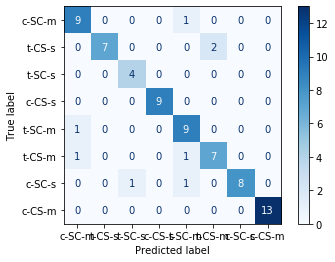

In [37]:
from sklearn.metrics import classification_report, confusion_matrix 

#print(classification_report(codedLabelTest, gridSC.predict(test[selected_features])))

#print(classification_report(codedLabelTest, classifiers["Logistic Regression"].predict(test[selected_features])))

#confusion_matrix(validation_y, gridSC.predict(validation_x[selected_features]))

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(gridSC, validation_x[selected_features], validation_y, 
                      display_labels = list(set(labelClass)),
                      cmap = plt.cm.Blues)  #
plt.show()  

In [38]:
validation_y

array([6, 0, 1, 3, 7, 1, 5, 7, 4, 7, 3, 0, 7, 1, 1, 3, 4, 2, 3, 6, 5, 4,
       1, 2, 0, 7, 0, 6, 4, 2, 5, 3, 0, 6, 5, 3, 4, 4, 1, 7, 6, 0, 5, 5,
       7, 7, 4, 3, 6, 7, 4, 6, 7, 3, 1, 7, 6, 0, 0, 4, 7, 5, 2, 5, 5, 1,
       3, 6, 0, 7, 0, 6, 4, 1])

In [39]:
param_grid_svm = {'C': [0.1, 1, 10, 100, 1000],  
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
                  'kernel': ['rbf', "linear", "poly", 'sigmoid']}  




gridSC_SVM = GridSearchCV(SVC(), #models[-3],  
                      param_grid = param_grid_svm, verbose = True,
                      cv = 10, scoring = make_scorer(accuracy), refit = True)

gridSC_SVM_best = gridSC_SVM.fit(train_x, train_y)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.5s finished


In [40]:
gridSC_SVM_best.score(validation_x[selected_features], validation_y)

0.8783783783783784

In [41]:
print(classification_report(codedLabelTest, gridSC_SVM_best.predict(test[selected_features])))

NameError: name 'codedLabelTest' is not defined

In [56]:
test = pd.read_csv("Data/test.csv")


In [57]:
y_test = test['class']
y_test
test = test.drop(columns = ['class'], axis = 1)

0      c-SC-m
1      c-SC-s
2      c-CS-m
3      t-SC-s
4      c-SC-s
        ...  
240    c-CS-m
241    t-CS-m
242    c-CS-m
243    t-CS-s
244    c-SC-s
Name: class, Length: 245, dtype: object

In [58]:
codedLabelTest = le.transform(y_test)
codedLabelTest

array([2, 3, 0, 7, 3, 1, 5, 4, 7, 4, 3, 3, 3, 6, 4, 4, 7, 7, 0, 0, 1, 3,
       5, 1, 1, 6, 5, 1, 4, 3, 2, 3, 2, 6, 7, 5, 7, 3, 6, 0, 7, 5, 6, 4,
       2, 7, 3, 3, 2, 3, 5, 1, 1, 2, 5, 3, 7, 3, 0, 7, 3, 0, 1, 7, 5, 1,
       4, 1, 3, 6, 2, 7, 2, 4, 2, 5, 2, 7, 4, 6, 6, 7, 4, 0, 4, 6, 5, 6,
       6, 2, 2, 3, 5, 6, 1, 1, 5, 5, 2, 0, 7, 5, 2, 7, 1, 3, 7, 2, 2, 5,
       4, 7, 0, 6, 2, 2, 4, 7, 7, 7, 2, 2, 0, 7, 4, 4, 1, 1, 4, 1, 1, 1,
       6, 0, 7, 7, 4, 7, 3, 2, 1, 3, 3, 7, 5, 1, 2, 2, 4, 2, 0, 7, 7, 2,
       7, 2, 6, 6, 0, 0, 7, 5, 4, 4, 3, 3, 0, 7, 2, 2, 5, 4, 0, 3, 4, 1,
       4, 4, 7, 6, 3, 4, 3, 6, 1, 0, 7, 0, 2, 7, 2, 4, 7, 5, 5, 5, 7, 4,
       7, 4, 4, 5, 2, 7, 6, 4, 7, 3, 3, 1, 1, 5, 5, 1, 6, 6, 7, 7, 6, 0,
       5, 5, 7, 5, 7, 2, 3, 1, 5, 0, 7, 0, 1, 5, 0, 5, 4, 5, 5, 4, 0, 4,
       0, 5, 3])